# **Data Study Notebook**

## Objectives

- Answer Business Requirement 1:
The client is interested in discovering how house attributes correlate with the sale price.
- Generate correlation & visualization code for the Streamlit dashboard.


## Inputs

* outputs/datasets/collection/HousePrices.csv

## Outputs

* Generate code that answers business requirement 1 and can be used to build the Streamlit App.
* Creating plots to see correlation for the selected variables.


---

## Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues/jupyter_notebooks'

Change the working directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues'

---

## Load Cleaned Dataset

In [4]:
import pandas as pd

df = pd.read_csv("outputs/datasets/cleaned/HousePricesCleaned.csv")
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,706,150,548,2003.0,1710,8450,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,978,284,460,1976.0,1262,9600,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,486,434,608,2001.0,1786,11250,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,3.0,216,540,642,1998.0,1717,9550,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.0,655,490,836,2000.0,2198,14260,350.0,84,5,8,1145,2000,2000,250000


## Data Exploration

In [5]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Create directory to save plots

In [6]:
import os
os.makedirs("docs/plots", exist_ok=True)

## Correlation and PPS Analysis

In [7]:
%matplotlib inline


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_theme(style="darkgrid")

# Heatmap: Pearson & Spearman
def heatmap_corr(df, threshold, figsize=(20,12), font_annot=9):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, ax = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, mask=mask, cmap="viridis",
                    annot_kws={"size": font_annot}, ax=ax, linewidth=0.5)
        ax.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()

# Heatmap: Power Predictive Score (PPS)
def heatmap_pps(df, threshold, figsize=(20,12), font_annot=9):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, mask=mask, cmap="rocket_r",
                    annot_kws={"size": font_annot}, linewidth=0.05, linecolor="gray")
        plt.ylim(len(df.columns), 0)
        plt.show()

# Calculate Correlations
def CalculateCorrAndPPS(df):
    pearson = df.corr(method="pearson")
    spearman = df.corr(method="spearman")
    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw[["x", "y", "ppscore"]].pivot(columns="x", index="y", values="ppscore")

    print("🔍 PPS Score Stats:")
    print(pps_matrix_raw.query("ppscore < 1")[["ppscore"]].describe().T.round(3))

    return pearson, spearman, pps_matrix

# Display Heatmaps
def DisplayCorrAndPPS(pearson, spearman, pps_matrix, corr_threshold=0.3, pps_threshold=0.2):
    print("*** Spearman Correlation ***")
    heatmap_corr(spearman, corr_threshold)

    print("*** Pearson Correlation ***")
    heatmap_corr(pearson, corr_threshold)

    print("*** Power Predictive Score (PPS) ***")
    heatmap_pps(pps_matrix, pps_threshold)


## Run Analysis

🔍 PPS Score Stats:
         count   mean    std  min  25%  50%    75%    max
ppscore  272.0  0.046  0.102  0.0  0.0  0.0  0.035  0.625
*** Spearman Correlation ***


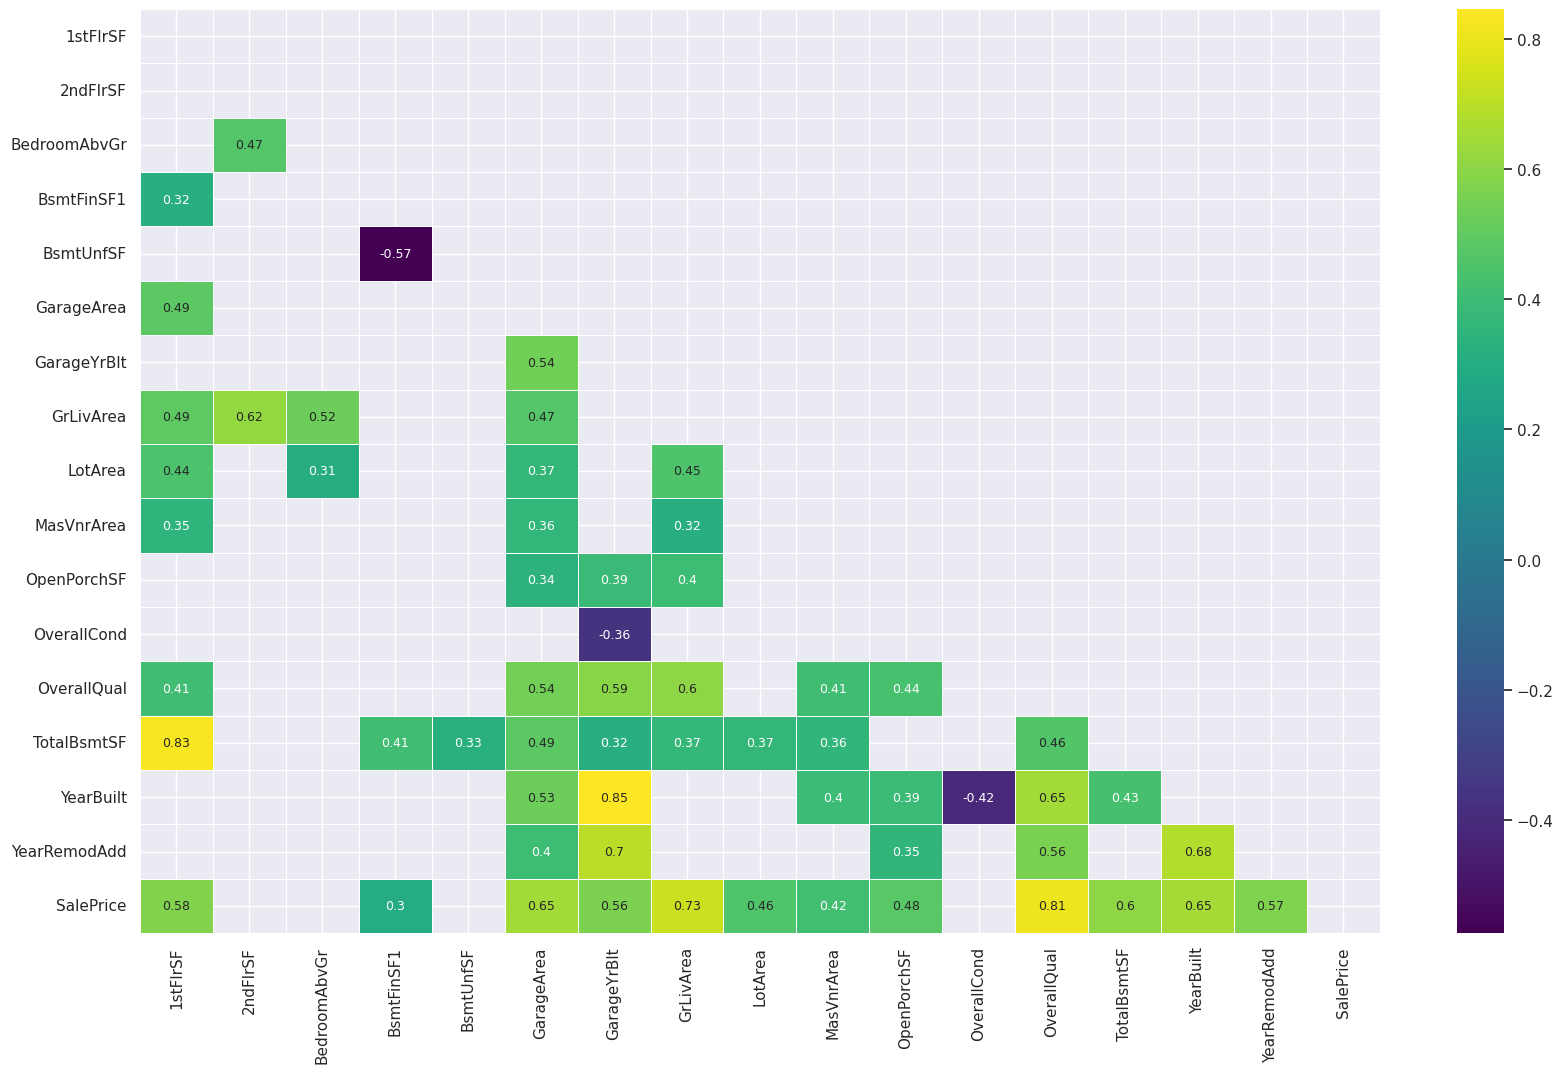

*** Pearson Correlation ***


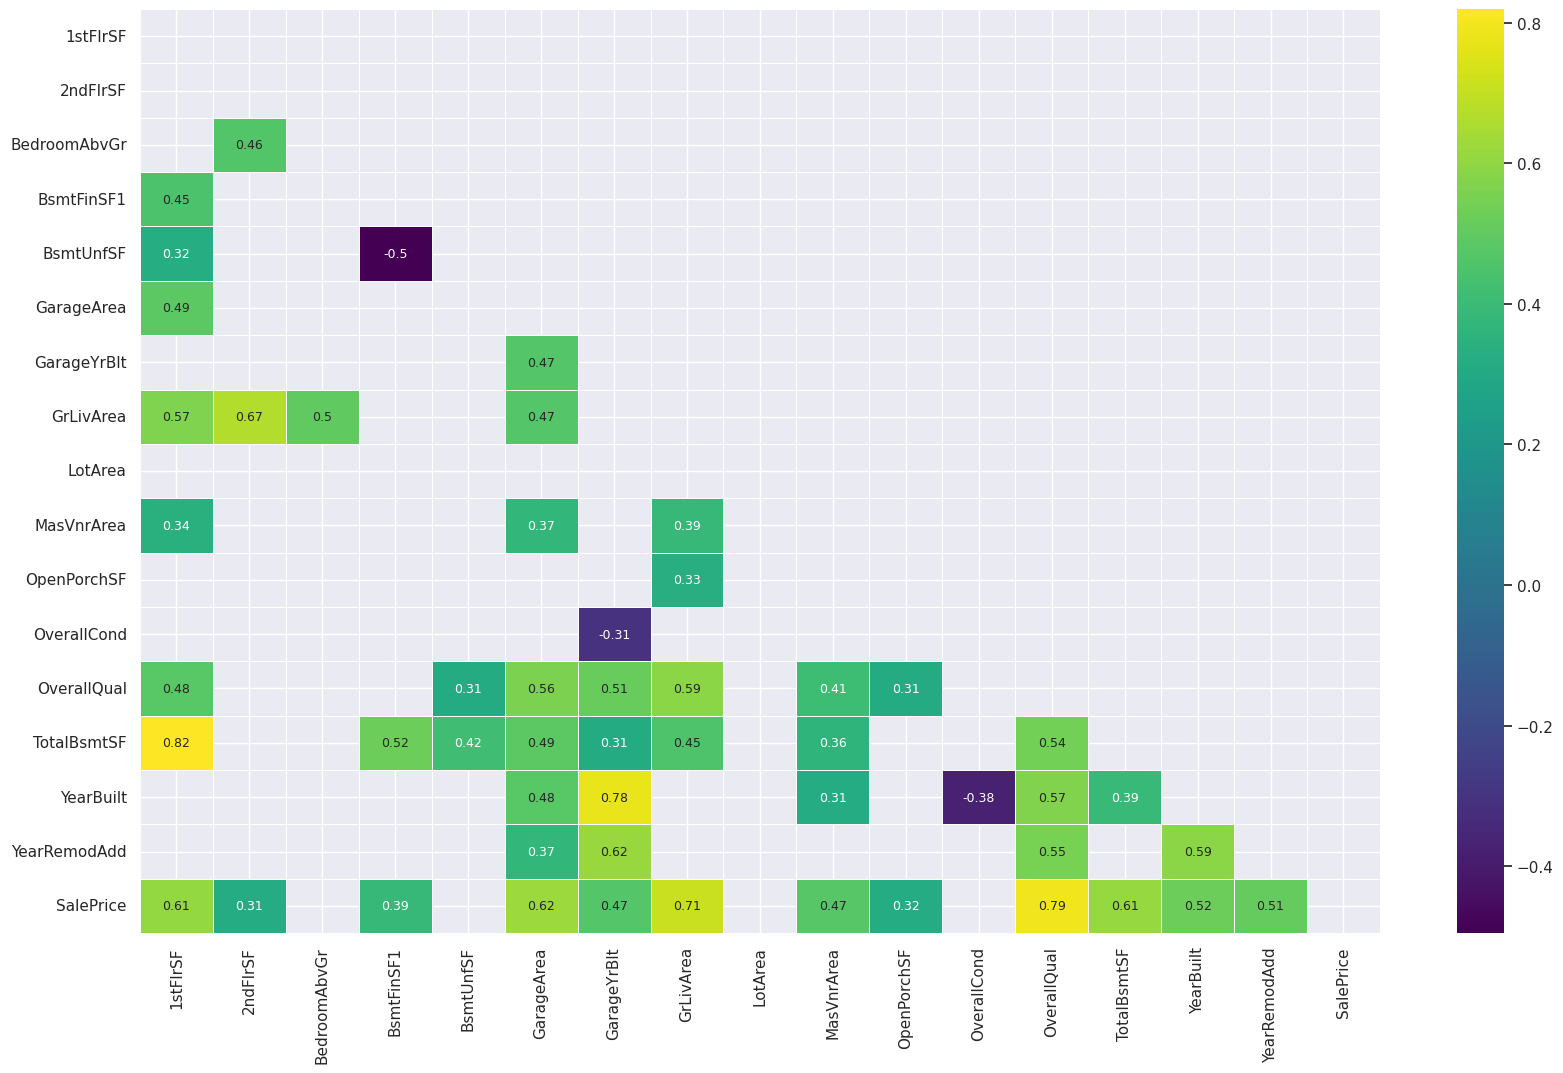

*** Power Predictive Score (PPS) ***


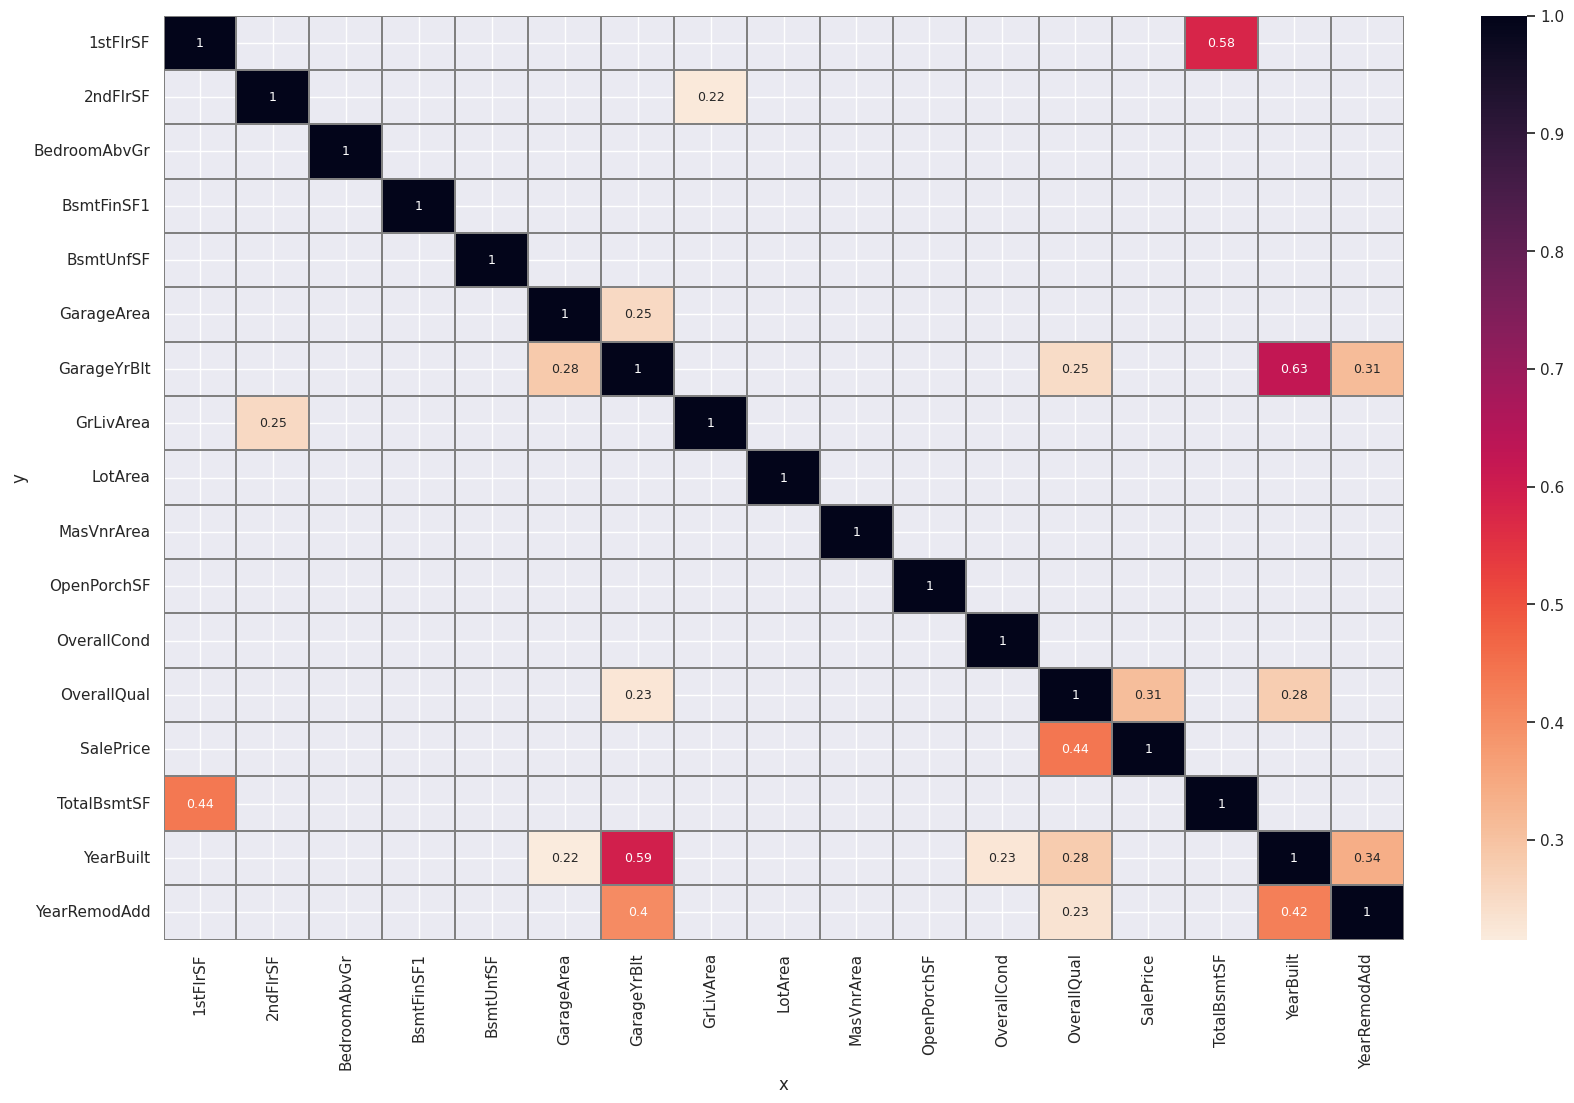

In [8]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)
DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, 0.3, 0.2)

## Select Top Variables for Visualization

In [9]:
# Based on both Pearson & Spearman Top 10
corr_p = df.corr(method="pearson")["SalePrice"].abs().sort_values(ascending=False)[1:11]
corr_s = df.corr(method="spearman")["SalePrice"].abs().sort_values(ascending=False)[1:11]

vars_to_study = list(set(corr_p.index.to_list() + corr_s.index.to_list()))
print(f"Variables to study: {vars_to_study}")


Variables to study: ['GarageYrBlt', 'MasVnrArea', 'TotalBsmtSF', 'OverallQual', 'LotArea', 'OpenPorchSF', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'GrLivArea', 'GarageArea', 'BsmtFinSF1']


## Create EDA Dataset

In [10]:
df_eda = df[vars_to_study + ["SalePrice"]]
df_eda.head()

,GarageYrBlt,MasVnrArea,TotalBsmtSF,OverallQual,LotArea,OpenPorchSF,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,GarageArea,BsmtFinSF1,SalePrice
0,2003.0,196.0,856,7,8450,61,2003,2003,856,1710,548,706,208500
1,1976.0,0.0,1262,6,9600,0,1976,1976,1262,1262,460,978,181500
2,2001.0,162.0,920,7,11250,42,2001,2002,920,1786,608,486,223500
3,1998.0,0.0,756,7,9550,35,1915,1970,961,1717,642,216,140000
4,2000.0,350.0,1145,8,14260,84,2000,2000,1145,2198,836,655,250000


## Plotting Function Setup

In [11]:
def plot_hist(df, target="SalePrice"):
    plt.figure(figsize=(14,6))
    sns.histplot(data=df, x=target, kde=True)
    plt.title(f"Distribution of {target}", fontsize=18)
    plt.savefig(f"docs/plots/hist_plot_{target}.png", bbox_inches="tight")
    plt.show()

def plot_lm(df, col, target="SalePrice"):
    sns.lmplot(data=df, x=col, y=target, ci=None, line_kws={"color":"orange"})
    plt.title(f"{col} vs {target}", fontsize=16)
    plt.savefig(f"docs/plots/lm_plot_price_by_{col}.png", bbox_inches="tight")
    plt.show()

def plot_line(df, col, target="SalePrice"):
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df, x=col, y=target)
    plt.title(f"{col} vs {target}", fontsize=16)
    plt.savefig(f"docs/plots/line_plot_price_by_{col}.png", bbox_inches="tight")
    plt.show()

def plot_box(df, col, target="SalePrice"):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x=col, y=target)
    plt.title(f"{col} vs {target}", fontsize=16)
    plt.savefig(f"docs/plots/box_plot_price_by_{col}.png", bbox_inches="tight")
    plt.show()


## Generate Plots

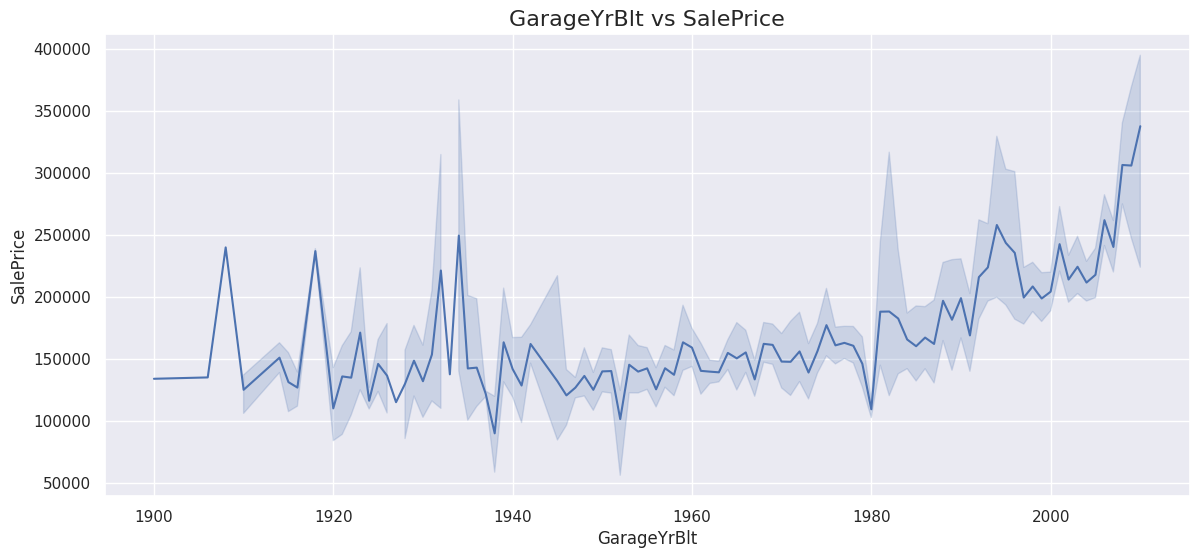

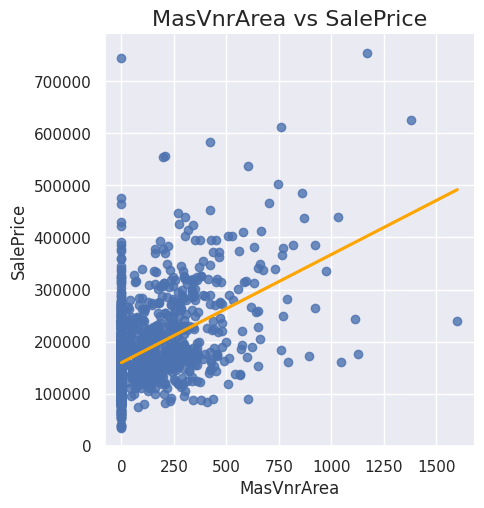

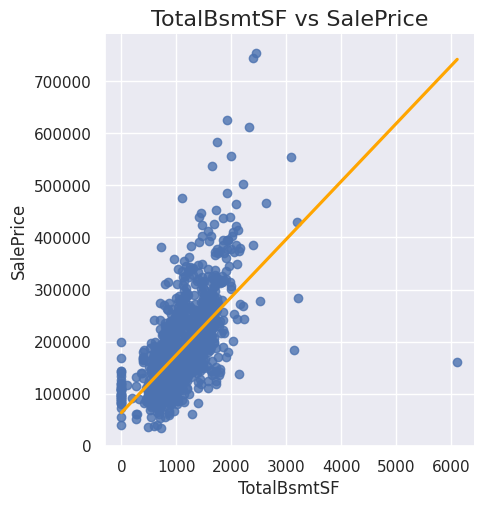

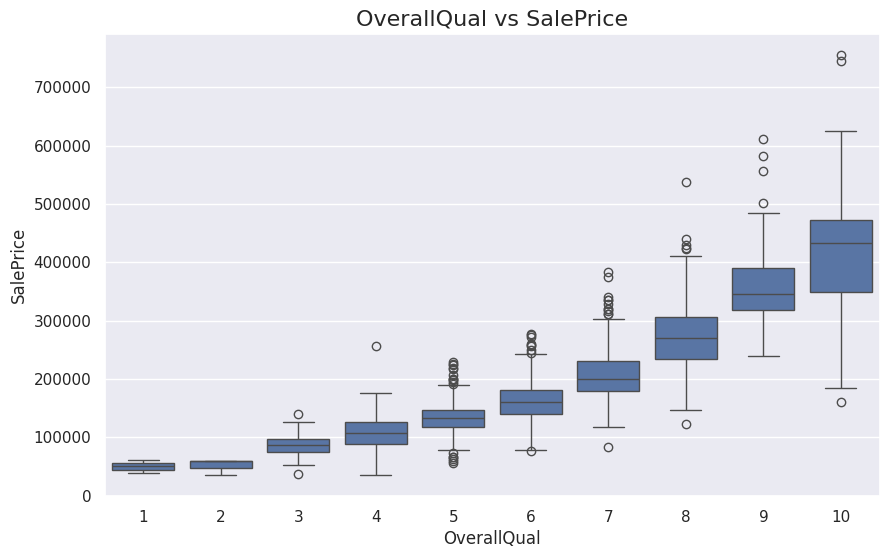

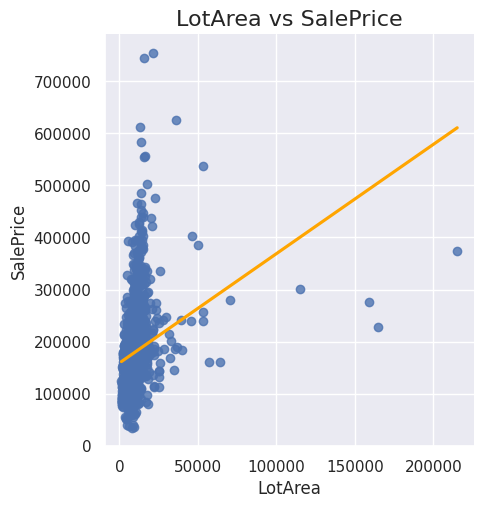

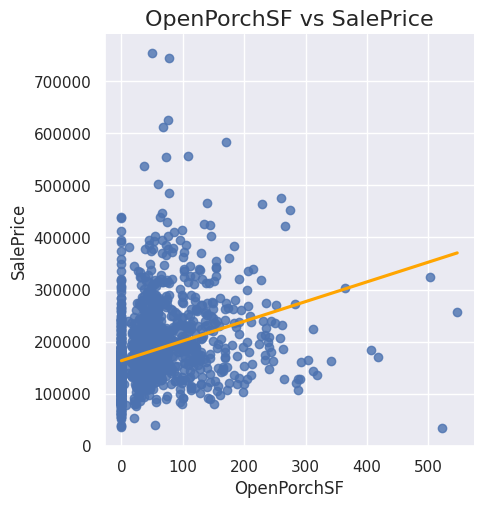

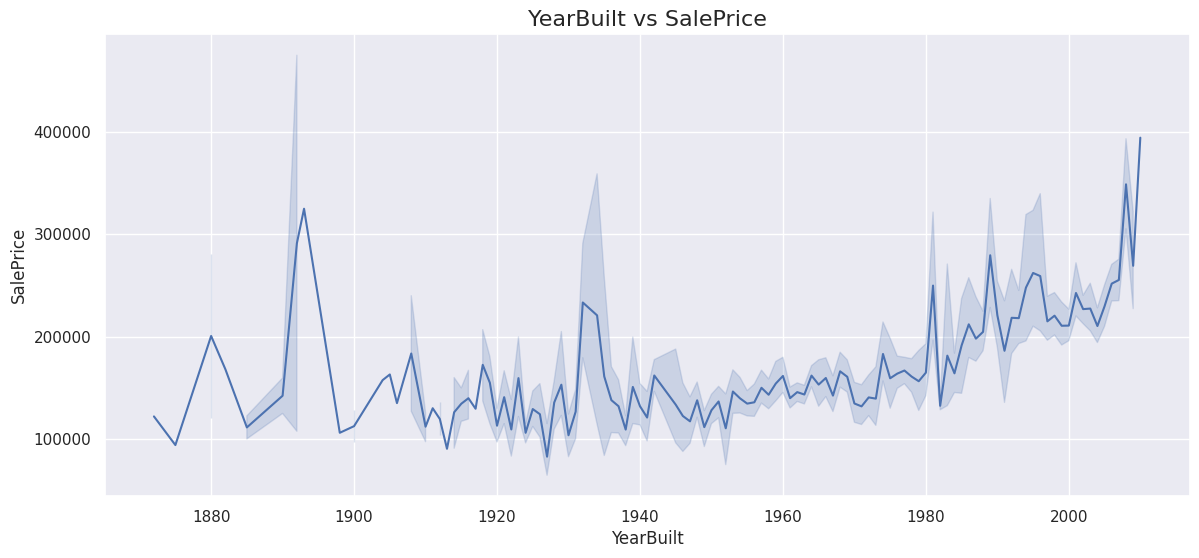

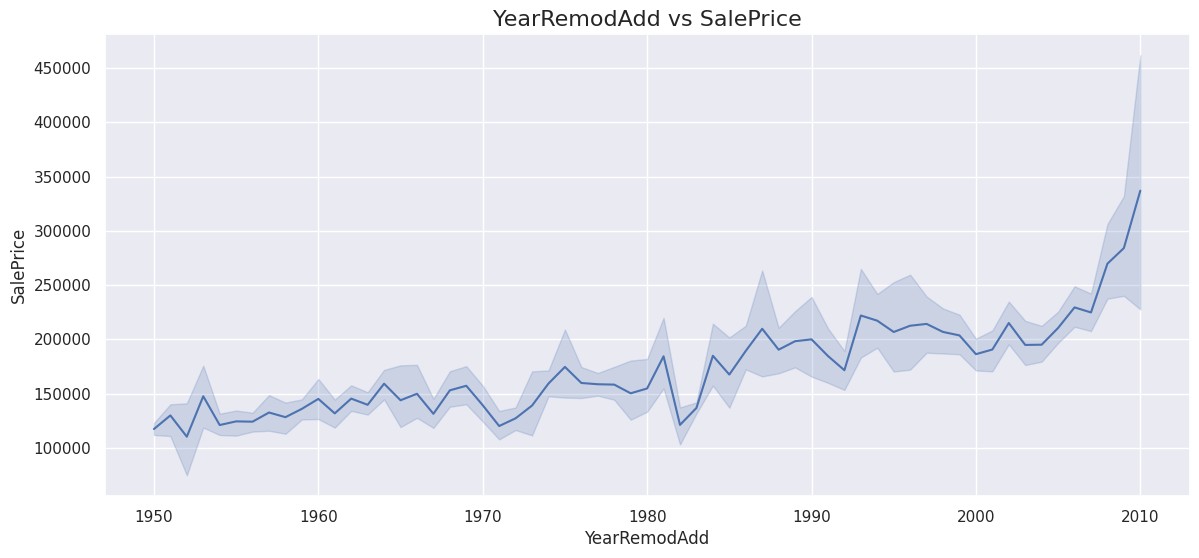

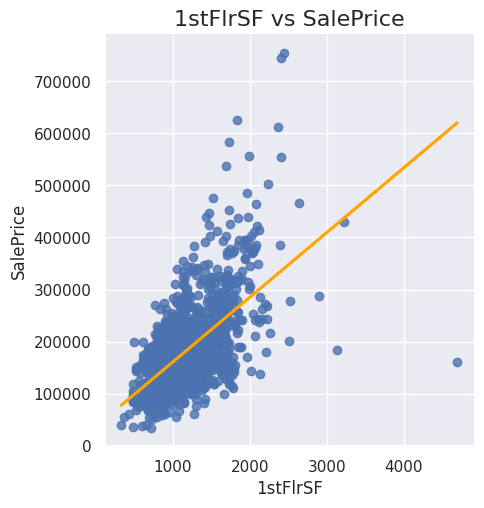

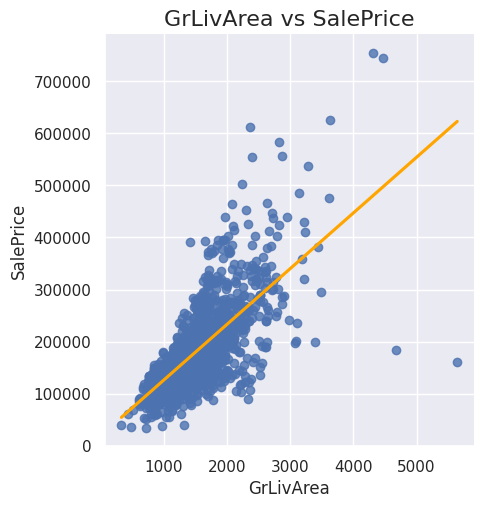

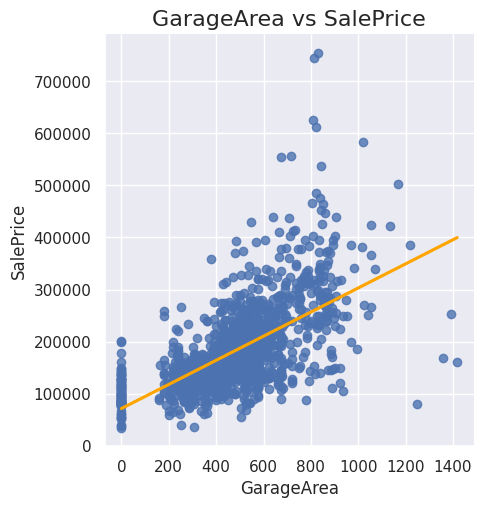

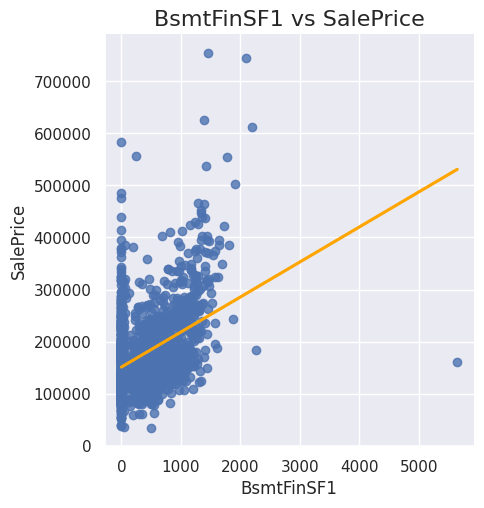

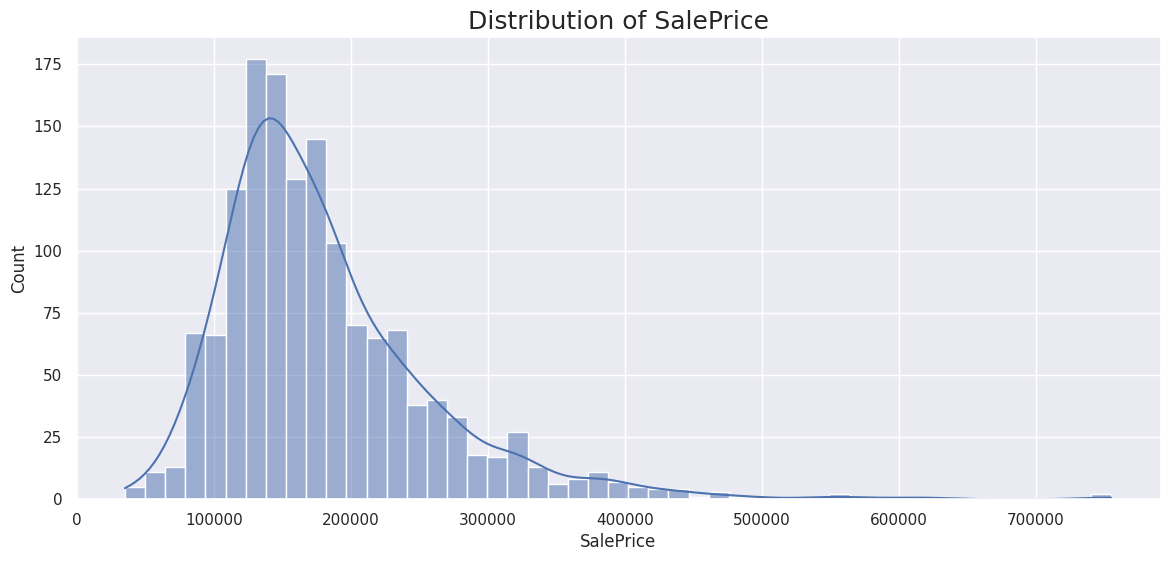

In [12]:
time_vars = ["YearBuilt", "YearRemodAdd", "GarageYrBlt"]
for col in vars_to_study:
    if df_eda[col].nunique() <= 10:
        plot_box(df_eda, col)
    elif col in time_vars:
        plot_line(df_eda, col)
    else:
        plot_lm(df_eda, col)

plot_hist(df_eda, "SalePrice")


---

## Summary and the next steps

**Summary**

The correlation analysis confirms:
- 'OverallQual', 'GrLivArea', and 'YearBuilt' show strong correlation with 'SalePrice'.
- Variables related to size (e.g., 1stFlrSF, TotalBsmtSF) and condition (e.g., OverallQual) are most predictive.
- From 1980 onwards, newer homes see significant price increases.

**Next Step**:
Proceed to Feature Engineering notebook.

